# Effective visualizations



![](https://opendata-ajuntament.barcelona.cat/sites/default/files/field/image/10819_234-235-DISE-Observatori%20Fabra-23-5-11-VZ%20%2806%29.jpg)

https://opendata-ajuntament.barcelona.cat/es/novetat-datasets-clima

## Warming stripes

In [74]:
# packages for working with our data
import pandas as pd
import numpy as np

In [90]:
import seaborn as sns

In [1]:
data_bcn_url = 'https://opendata-ajuntament.barcelona.cat/data/dataset/73f09843-ab4e-4f13-81fb-b801ca371909/resource/75d5ad34-045b-4e07-aa77-6d936f4c7e46/download/temperaturesbarcelonadesde1780_format_long.csv'

In [6]:
mes = 12

In [7]:
f'{mes:02}'

'12'

In [14]:
df = pd.read_csv(data_bcn_url)

In [21]:
df

,Any,Mes,Desc_Mes,Temperatura
0,1780,1,Gener,6.7
1,1780,2,Febrer,7.3
2,1780,3,Març,11.6
3,1780,4,Abril,11.4
4,1780,5,Maig,16.3
...,...,...,...,...
2911,2022,8,Agost,27.2
2912,2022,9,Setembre,22.5
2913,2022,10,Octubre,20.7
2914,2022,11,Novembre,15.2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Any          2916 non-null   int64  
 1   Mes          2916 non-null   int64  
 2   Desc_Mes     2916 non-null   object 
 3   Temperatura  2916 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 91.2+ KB


In [18]:
from datetime import datetime

In [25]:
df['fecha'] = df.apply(lambda x: datetime.strptime(f'{x["Any"]}-{x["Mes"]:02}', '%Y-%m'), axis=1)

In [31]:
temp = df.set_index('fecha')['Temperatura']

<AxesSubplot: xlabel='fecha'>

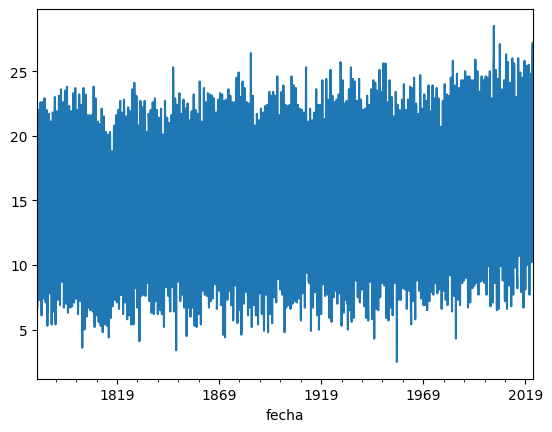

In [32]:
temp.plot()

In [37]:
ref = temp['1950':'1980'].mean()

In [42]:
temp

fecha
1780-01-01     6.7
1780-02-01     7.3
1780-03-01    11.6
1780-04-01    11.4
1780-05-01    16.3
              ... 
2022-08-01    27.2
2022-09-01    22.5
2022-10-01    20.7
2022-11-01    15.2
2022-12-01    12.6
Name: Temperatura, Length: 2916, dtype: float64

In [49]:
anomaly = (temp.resample('Y').mean()-ref)

In [62]:
len(anomaly)

243

In [43]:
temp_anual= pd.DataFrame()

In [53]:
temp_anual['year']=anomaly.index.year

In [63]:
temp_anual['anomaly'] = anomaly.values

In [65]:
temp_anual['temperature'] = temp.resample('Y').mean().values

In [66]:
temp_anual

,year,anomaly,temperature
0,1780,-0.583333,14.075000
1,1781,0.058333,14.716667
2,1782,-1.025000,13.633333
3,1783,-0.258333,14.400000
4,1784,-1.041667,13.616667
...,...,...,...
238,2018,1.625000,16.283333
239,2019,1.866667,16.525000
240,2020,2.100000,16.758333
241,2021,1.800000,16.458333


In [67]:
# packages for plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap

In [68]:
# latitude and longitude for Seattle, WA
latitude = 47.654
longitude = -122.308

In [69]:
# Barcelona, Spain
latitude = 41.4048551611668
longitude = 2.18647684270836

This is our custom colormap from [colorbrewer2](http://colorbrewer2.org), we could also use one of the [colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) that come with `matplotlib`, e.g. `coolwarm` or `RdBu`.

In [70]:
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

Finally, we create bars for each year as a [PatchCollection](https://matplotlib.org/3.3.2/gallery/shapes_and_collections/patch_collection.html) of [Rectangles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.patches.Rectangle.html), make the plot and save it as a jpg image.

In [72]:
def warm_stripe(df_annual):
   
    # Define the shape of each bar
    rect_ll_y = df_annual.anomaly.min() # rectangle lower left y coordinate, minimum anomaly value
    rect_height = np.abs(df_annual.anomaly.max()-df_annual.anomaly.min()) # rectangle height, range between min and max anomaly values
    year_start = df_annual.year.min() # year to start the plot x axis
    year_end = df_annual.year.max() + 1 # year to end the plot x axis


    # create a collection with a rectangle for each year
    col = PatchCollection([
        Rectangle((x, rect_ll_y), 1, rect_height)
        for x in range(year_start, year_end)
    ])

    # set data, colormap and color limits
    col.set_array(df_annual.anomaly) # use the anomaly data for the colormap
    col.set_cmap(cmap) # apply our custom red/blue colormap colors
    col.set_clim(-rect_height/2, rect_height/2) # set the limits of our colormap

    # Create the figure, assign the data, colormap and color limits and add it to the figure axes
    fig = plt.figure(figsize=(5, 1))

    # set up the axes
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_axis_off()


    ax.add_collection(col)

    # Make sure the axes limits are correct and save the figure.
    ax.set_ylim(-rect_height/2, rect_height/2) # set y axis limits to rectanlge height centered at zero
    ax.set_xlim(year_start, year_end); # set x axes limits to start and end year

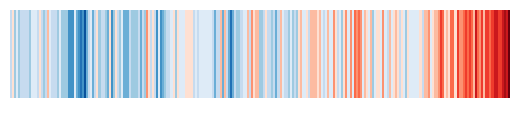

In [75]:
warm_stripe(temp_anual)

In [76]:

def draw_warming_stripe(df, title='Barcelona'):
    # Create a pivot table to aggregate the temperature anomaly values by year and month
    pivot_table = df.pivot(index='month', columns='year', values='anomaly')
    
    # Define a color palette ranging from blue to red
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    # Create the warming stripe plot using the heatmap function from Seaborn
    fig, ax = plt.subplots(figsize=(8, 2))
    ax = sns.heatmap(pivot_table, cmap=cmap, cbar=False, linewidths=0, linecolor='gray')
    
    # Hide the x-axis and y-axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')


    # Set the title of the plot to 'Warming Stripe'
    ax.set_title(title)
    
    # Show the plot
    plt.show()


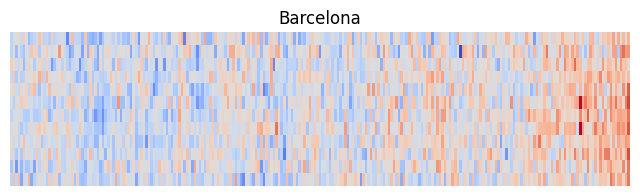

In [163]:
draw_warming_stripe(temp_mensual)

## Warming spirals

In [86]:
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)
import math
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd

In [83]:
def segment_circle(num_segments):
    """Split a circle into num_segments segments
    
    Args:
        num_segments (int): number of segments to split the circle into
        
    Returns:
        a numpy array of size [num_segments x 3] containing the (x, y)
        co-ordinates of the segment and it's angle in radians
    """
    # calculate the size in radians of each segment of the circle
    segment_rad = 2*np.pi/num_segments
    # create a list of all the radians for each segment
    segment_rads = segment_rad*np.arange(num_segments)
    # calculate the X,Y co-ordinates for each segment
    coordX = np.cos(segment_rads)
    coordY = np.sin(segment_rads)
    # return the concatenation of the 3 arrays along the second axis
    return np.c_[coordX, coordY, segment_rads]

In [84]:
def plot_spiral(x_orig, r=7):

    # months - these go backwards and start at March
    months = ["Mar", "Feb", "Jan", "Dec", "Nov", "Oct", "Sep", "Aug", "Jul", "Jun", "May", "Apr"]
    # month index lookup table
    month_idx = [2, 1, 0, 11, 10, 9, 8, 7, 6, 5, 4, 3]
    radius = r + 0.4
    month_points = segment_circle(len(months))

    mmin = x_orig.min()
    mmax = x_orig.max()
    rango = x_orig.max() - x_orig.min()
    print(r, mmin, mmax, rango)
    
    r_factor = r / rango  # original scale goes from -1.5 to 2.1. adjusted scale goes from 0 to 3.6

    x_vals = []
    y_vals = []
    for i in range(0, len(x_orig)):
        r_pos = (x_orig[i] - mmin) * r_factor
        x_unit_r, y_unit_r = month_points[month_idx[i % 12], :2]
        x_r, y_r = (r_pos*x_unit_r, r_pos*y_unit_r)
        x_vals.append(x_r)
        y_vals.append(y_r)
    
    segments = [np.column_stack([x, y]) for x, y in zip(x_vals, y_vals)]
    pts = np.array([x_vals, y_vals]).T.reshape(-1, 1, 2)
    segments = np.concatenate([pts[:-1], pts[1:]], axis=1)

    lc = LineCollection(segments, cmap=plt.get_cmap('jet'), norm=plt.Normalize(0, 3.6))
    lc.set_array(np.asarray(x_orig))

    fig, ax = plt.subplots(figsize=(14, 14))
    fig.patch.set_facecolor('grey')
    ax.axis('equal')

    ax.set(xlim=(-10, 10), ylim=(-10, 10))

    circle = plt.Circle((0, 0), r, fc='#000000')
    ax.add_patch(circle)

    circle_2 = plt.Circle((0, 0), r_factor * 2.5, ec='red', fc=None, fill=False, lw=3.0)
    ax.add_patch(circle_2)
    circle_1_5 = plt.Circle((0, 0), r_factor * 3.0, ec='red', fc=None, fill=False, lw=3.0)
    ax.add_patch(circle_1_5)

    props_months = {'ha': 'center', 'va': 'center', 'fontsize': 24, 'color': 'white'}
    props_year = {'ha': 'center', 'va': 'center', 'fontsize': 36, 'color': 'white'}
    props_temp = {'ha': 'center', 'va': 'center', 'fontsize': 32, 'color': 'red'}
    ax.text(0, r_factor * 2.5, '1.5°C', props_temp, bbox=dict(facecolor='black'))
    ax.text(0, r_factor * 3.0, '2.0°C', props_temp, bbox=dict(facecolor='black'))
    ax.text(0, r + 1.4, 'Global temperature change (1850-2021)', props_year)

    # draw the month legends around the rim of the circle
    for j in range(0, len(months)):
        x_unit_r, y_unit_r, angle = month_points[j]
        x_radius, y_radius = (radius * x_unit_r, radius * y_unit_r)
        angle = angle - 0.5 * np.pi
        ax.text(x_radius, y_radius, months[j], props_months, rotation=np.rad2deg(angle), )

    # add all the lines with their colours    
    plt.gca().add_collection(lc)
    # rescale everything so it fits in the space
    ax.autoscale()
    # turn off the graph axis
    ax.axis("off")
    # show the graph
    plt.show()

In [95]:
temp_mensual = temp.resample('M').mean().reset_index()

In [99]:
temp_mensual['month'] = temp_mensual.fecha.dt.month

In [101]:
temp_mensual['year'] = temp_mensual.fecha.dt.year

In [102]:
temp_mensual.set_index('fecha', inplace=True)

In [104]:
temp_mensual

,Temperatura,mes,month,year
fecha,,,,
1780-01-31,6.7,1,1,1780
1780-02-29,7.3,2,2,1780
1780-03-31,11.6,3,3,1780
1780-04-30,11.4,4,4,1780
1780-05-31,16.3,5,5,1780
...,...,...,...,...
2022-08-31,27.2,8,8,2022
2022-09-30,22.5,9,9,2022
2022-10-31,20.7,10,10,2022


In [116]:
# Group the data by month and calculate the mean temperature for each month
mean_temp_by_month = temp_mensual['1951':'1980'].groupby('month')['Temperatura'].mean()

In [117]:
mean_temp_by_month

month
1      7.983333
2      8.633333
3     10.480000
4     12.336667
5     16.050000
6     19.613333
7     22.603333
8     22.390000
9     19.903333
10    15.723333
11    11.230000
12     8.636667
Name: Temperatura, dtype: float64

In [121]:
mean_temp_by_month.loc[1]

7.983333333333333

In [124]:
temp_mensual

,Temperatura,mes,month,year
fecha,,,,
1780-01-31,6.7,1,1,1780
1780-02-29,7.3,2,2,1780
1780-03-31,11.6,3,3,1780
1780-04-30,11.4,4,4,1780
1780-05-31,16.3,5,5,1780
...,...,...,...,...
2022-08-31,27.2,8,8,2022
2022-09-30,22.5,9,9,2022
2022-10-31,20.7,10,10,2022


In [125]:

# Create a new column called 'anomaly' that contains the temperature anomaly for each month
temp_mensual['anomaly'] = temp_mensual.apply(lambda row: row['Temperatura'] - mean_temp_by_month.loc[row['month']], axis=1)


In [150]:
datos = temp_mensual['anomaly']['1980':'2019']

<AxesSubplot: xlabel='fecha'>

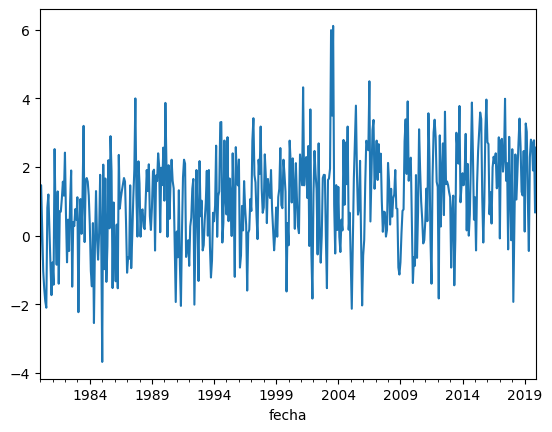

In [151]:
datos.plot()

In [140]:
mean_temp_by_month

month
1      7.983333
2      8.633333
3     10.480000
4     12.336667
5     16.050000
6     19.613333
7     22.603333
8     22.390000
9     19.903333
10    15.723333
11    11.230000
12     8.636667
Name: Temperatura, dtype: float64

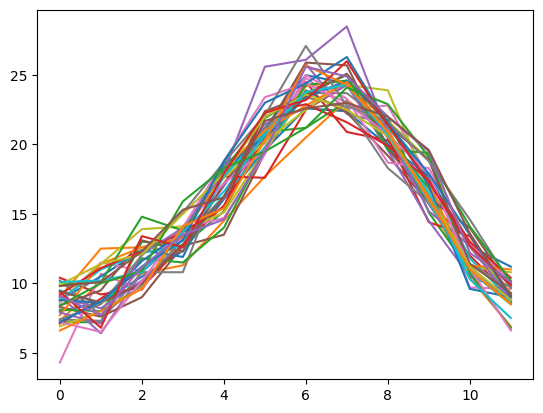

In [154]:
plt.plot(mean_temp_by_month.values)
for i in range(1980,2015):
    datos = temp_mensual['Temperatura'][f'{i}']
    plt.plot(datos.values)

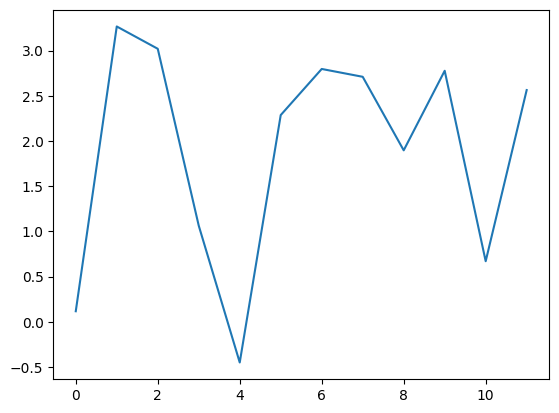

In [146]:
plt.plot(datos.values- mean_temp_by_month.values)

<AxesSubplot: xlabel='fecha'>

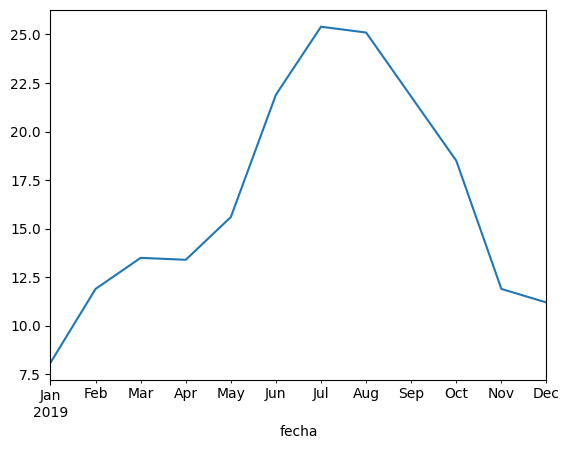

In [142]:
datos.plot()


In [161]:
datos = temp_mensual['anomaly']['2001']

<AxesSubplot: xlabel='fecha'>

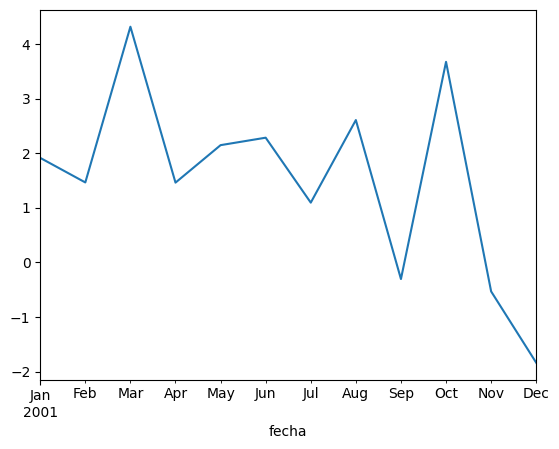

In [162]:
datos.plot()

7 -0.2833333333333332 2.7666666666666675 3.0500000000000007


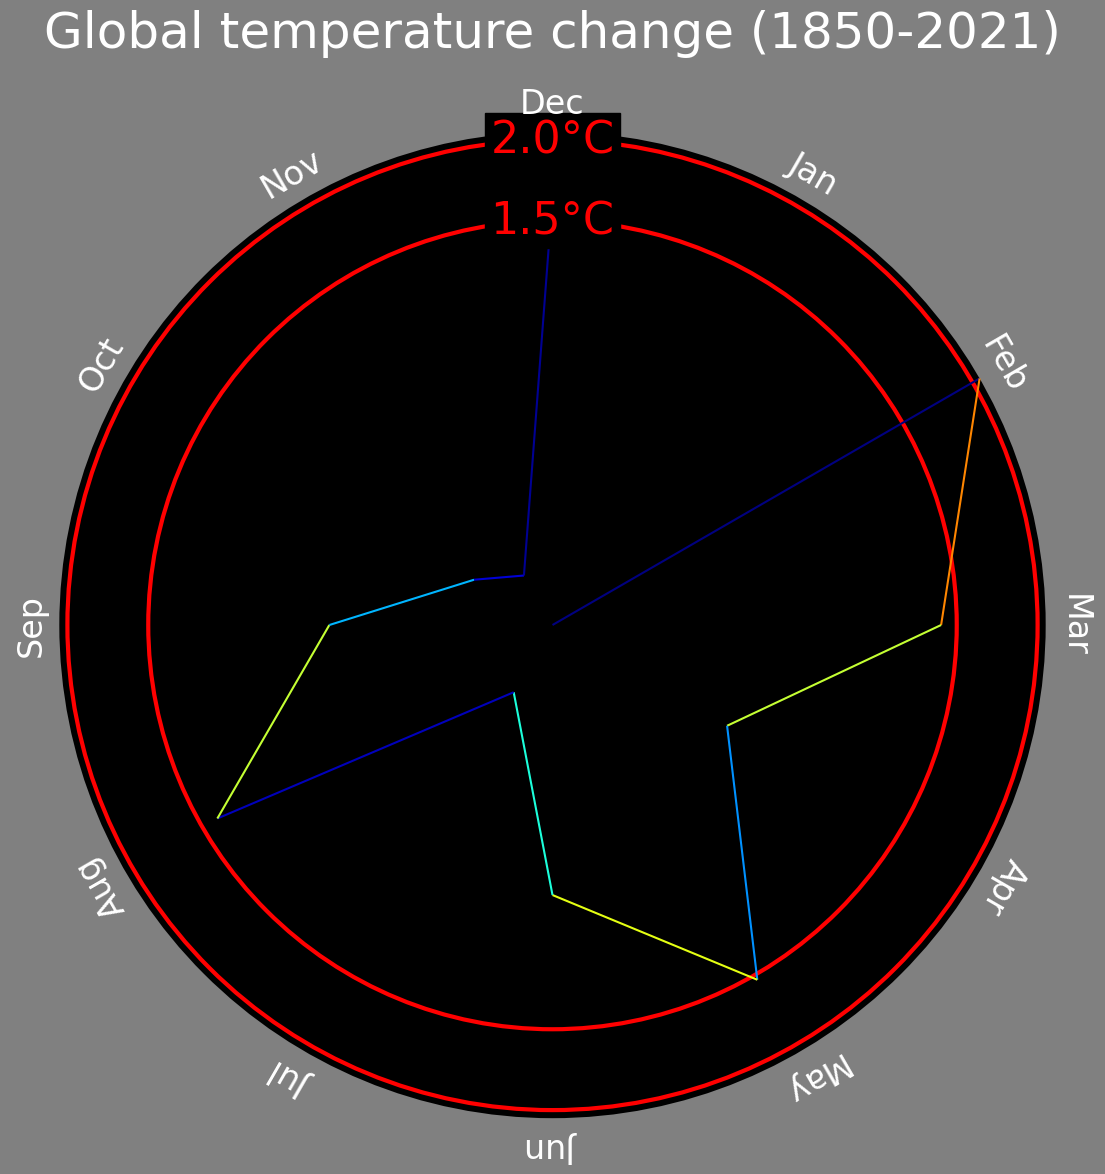

In [159]:
plot_spiral(datos)

https://www.aemet.es/documentos/es/noticias/2022/Avanceclimaticonacionalanual2021.pdf

http://berkeleyearth.lbl.gov/regions/spain#